In [511]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
from brian2.units import *
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

In [512]:
data = np.load("../../synaptogenesis/structural_results_stdp_093200_17062017.npz")

In [513]:
data

In [514]:
simtime = int(data['simtime'])

In [515]:
pre_spikes = data['pre_spikes']
post_spikes = data['post_spikes']

In [516]:
pre_spikes = pre_spikes[:, :].astype(dtype=np.int32)
post_spikes = post_spikes[:, :].astype(dtype=np.int32)

In [453]:
pre_spikes_times = np.zeros((16,16,simtime))
post_spikes_times = np.zeros((16,16,simtime))

MemoryError: 

In [454]:
for id, time in pre_spikes:
    pre_spikes_times[id/16, id%16, time] = 1
for id, time in post_spikes:
    post_spikes_times[id/16, id%16, time] = 1    

IndexError: index 80016 is out of bounds for axis 2 with size 80000

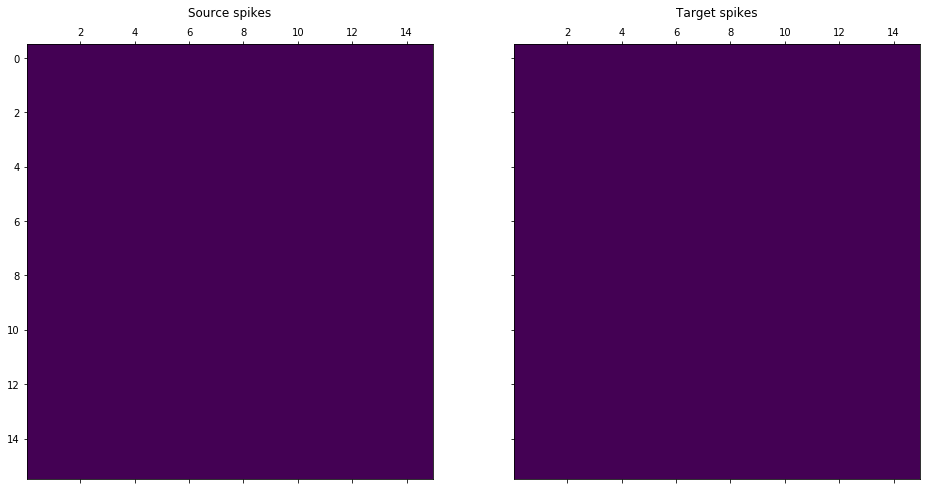

In [442]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    
pre_image = np.zeros((16,16))
post_image = np.zeros((16,16))
source_ax = ax1.matshow(pre_image, vmin=0, vmax=110)
target_ax = ax2.matshow(post_image, vmin=0, vmax=140)

ax1.set_title("Source spikes")
ax2.set_title("Target spikes")

In [443]:
def init():
    global pre_image, post_image
#     line.set_data(input_rates/Hz)
    source_ax.set_data(np.zeros((16,16)))
    target_ax.set_data(np.zeros((16,16)))
    pre_image = np.zeros((16,16))
    post_image = np.zeros((16,16))
    return (source_ax, target_ax, )

In [444]:
def animate(i):
    global pre_image, post_image, pre_spikes_times, post_spikes_times
    
    pre_image += pre_spikes_times[0:16, 0:16, i] * 100
    post_image += post_spikes_times[0:16, 0:16, i] * 100
            
    source_ax.set_data(pre_image)
    target_ax.set_data(post_image)
    pre_image *= .8
    post_image *= .8
    return (source_ax,target_ax,)

In [445]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=60, blit=True)

In [244]:
HTML(anim.to_html5_video())

MemoryError: 

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)

In [446]:
anim.save('nicer_network_activity_10s.mp4', writer=writer)

TODO 

Analyse whether most spikes happen around the area of the input (0, 10) and less in the centre

Run experiment with 256 poisson spikes (more in centre, less on the edge

Plot weight changes over time (256x256 matrix)

Reduce fps when saving files

In [69]:
# Where are spikes happening most often?
post_count = np.zeros((16,16))
post_count = np.count_nonzero(post_spikes_times[0:16, 0:16, :], axis=2)

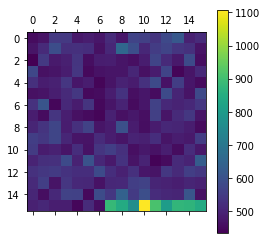

In [70]:
plt.matshow(post_count, fignum=180)
plt.grid(visible=False)
plt.colorbar()

Huh, that's a weird shape and number ... It also doesn't tell me which synapses the weights are for

In [289]:
# an all to all connectivity would have
no_syn = (256 * 255)//2
print no_syn, "synapses"

32640 synapses


In [455]:
def plot_spikes(spikes, title):
    if spikes is not None:
        f, ax1 = plt.subplots(1, 1, figsize=(24, 12))
        ax1.set_xlim((0, simtime))
        ax1.scatter([i[1] for i in spikes], [i[0] for i in spikes],s=1, marker="|")
        ax1.set_xlabel('Time/ms')
        ax1.set_ylabel('spikes')
        ax1.set_title(title)

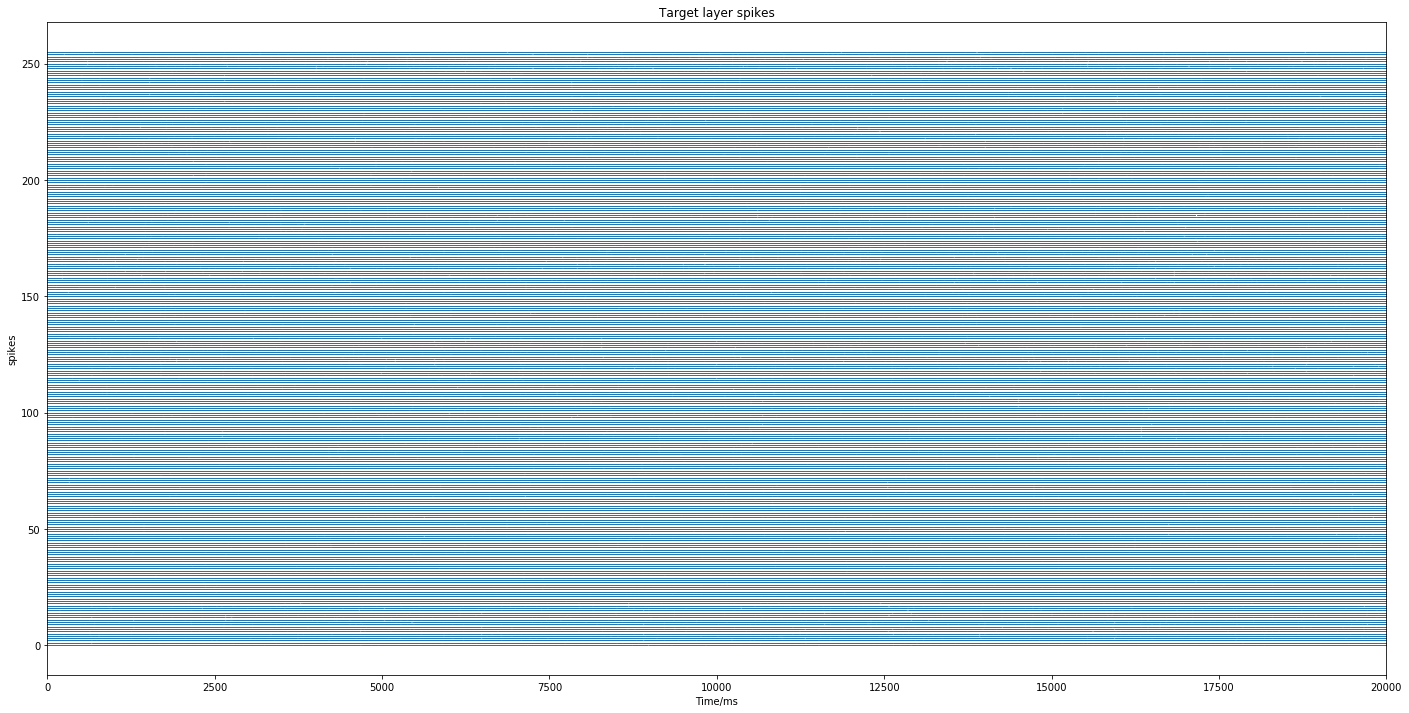

In [477]:
plot_spikes(post_spikes, "Target layer spikes")

In [478]:
len(post_spikes)

621892

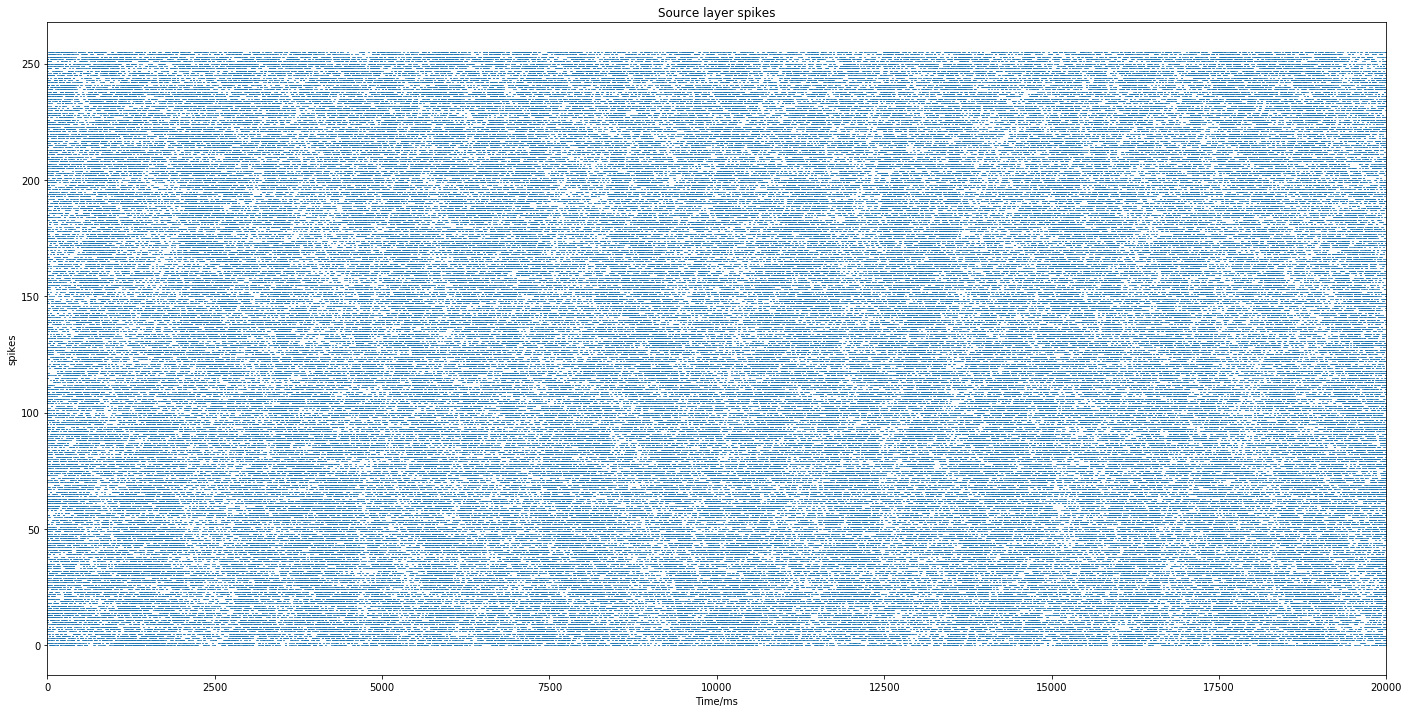

In [479]:
plot_spikes(pre_spikes, "Source layer spikes")

In [398]:
mean_rates = np.zeros(256)

In [399]:
count_spikes = np.zeros(256)
for id, time in pre_spikes:
    count_spikes[id] += 1

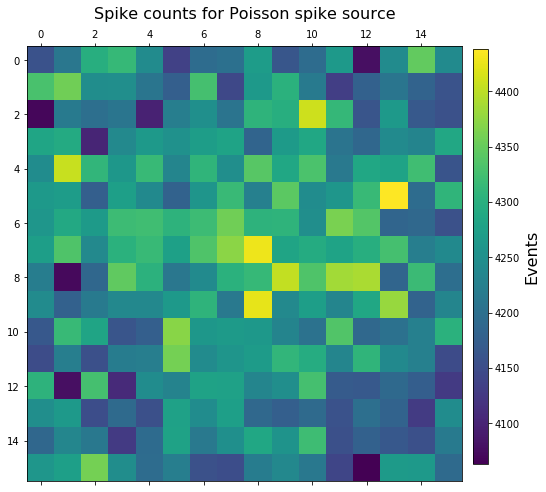

In [400]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(count_spikes.reshape(16,16))
ax1.grid(visible=False)
ax1.set_title("Spike counts for Poisson spike source", fontsize=16)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

In [401]:
mean_rates = count_spikes / float(simtime * msecond)

In [402]:
np.average(mean_rates)

53.075781250000006

In [517]:


pre_weights= data['pre_weights']

post_weights= data['post_weights']

In [518]:
print pre_weights.shape
print pre_weights.size
print 
print post_weights.shape
print post_weights.size

print np.max(post_weights)

(160, 256, 256)
10485760

(160, 256, 256)
10485760
nan


In [519]:
init_ff_connections = data['init_ff_connections']
init_lat_connections = data['init_lat_connections']

In [520]:
init_ff_connections.shape

(256, 256)

In [521]:
pre_weights.shape

(160, 256, 256)

In [522]:
simdata = np.array(data['sim_params']).ravel()[0]

In [523]:
simdata

{'f_base': 5,
 'f_peak': 152,
 'g_max': 0.2,
 'sigma_stim': 2,
 'simtime': 80000,
 't_record': 500,
 't_stim': 20}

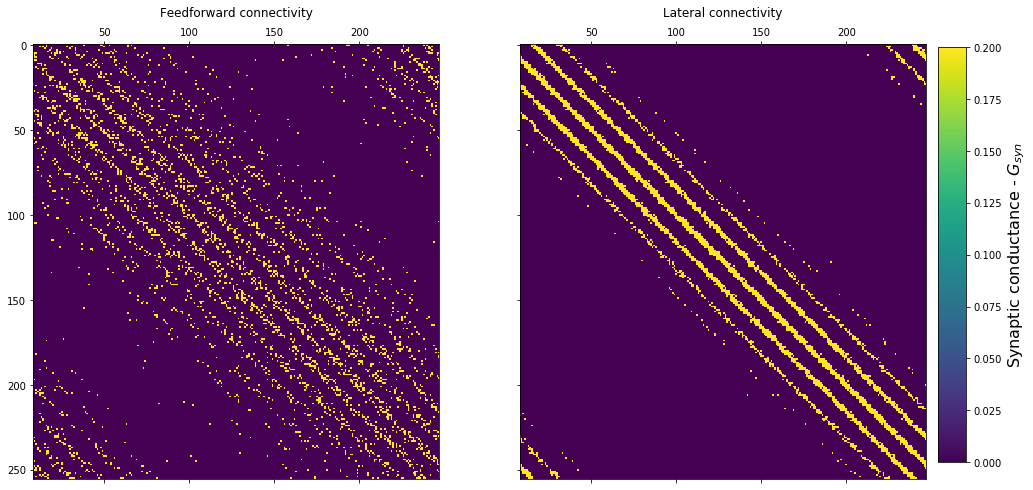

In [524]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(np.nan_to_num(init_ff_connections), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(np.nan_to_num(init_lat_connections), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [525]:
def init_conn():
#     line.set_data(input_rates/Hz)
#     ff_conn_ax.set_data(np.zeros((16,16)))
    return (ff_conn_ax, lat_conn_ax)

def animate_conn(i):
    global ff_conn_image, lat_conn_image
    if i == 0:
        ff_conn_ax.set_data(np.nan_to_num(init_ff_connections))
        lat_conn_ax.set_data(np.nan_to_num(init_lat_connections))
    else:
        ff_conn_ax.set_data(np.nan_to_num(pre_weights[i-1].reshape(256,256)))
        lat_conn_ax.set_data(np.nan_to_num(post_weights[i-1].reshape(256,256)))
    return (ff_conn_ax, lat_conn_ax)

In [526]:
anim_conn = animation.FuncAnimation(fig_conn, animate_conn, init_func=init_conn,
                               frames= simdata['simtime']//simdata['t_record'], 
                            interval=200, blit=True)

In [527]:
HTML(anim_conn.to_html5_video())

In [530]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)
anim_conn.save('conn_evo.mp4', writer=writer)

In [415]:
simdata['simtime']

80000

In [528]:
simdata['t_record']

500

In [531]:
pre_weights.shape

(160, 256, 256)

In [532]:
np.count_nonzero(np.nan_to_num(pre_weights[1, :, :]) -np.nan_to_num(pre_weights[0, :, :]))

4109

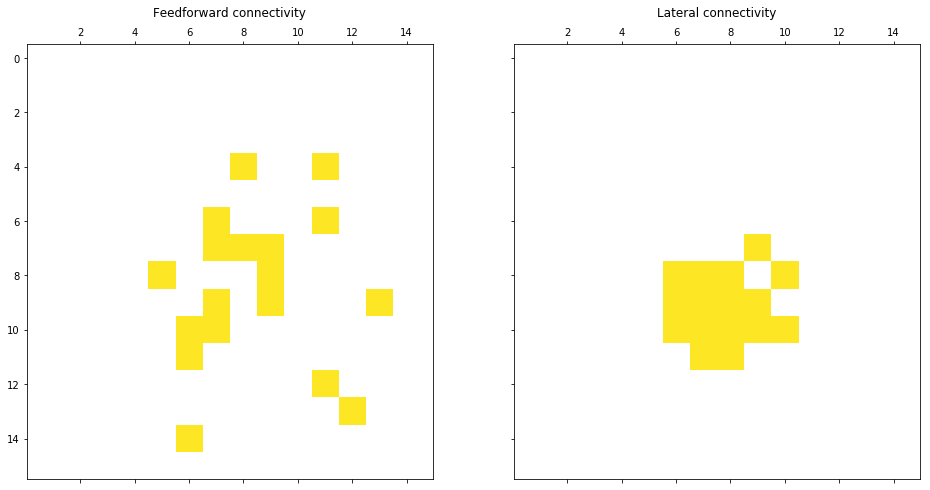

In [533]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(init_ff_connections[8*19, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(init_lat_connections[8*19, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

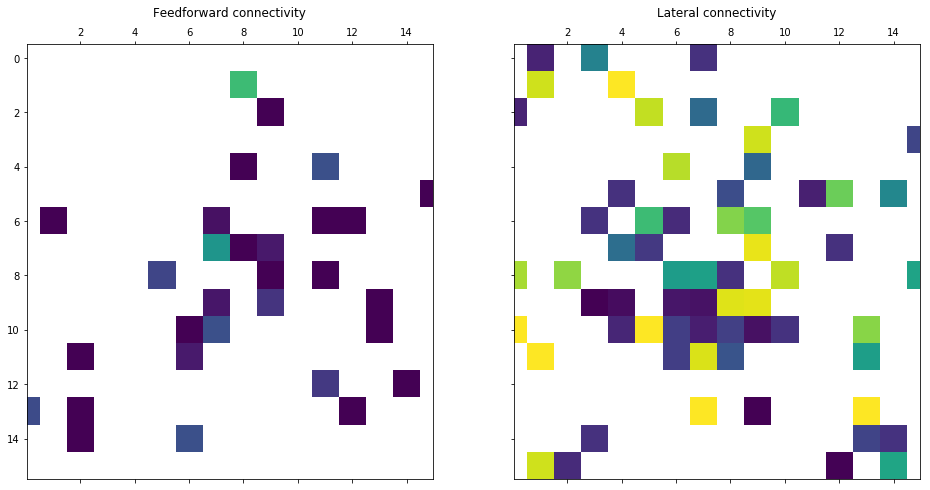

In [534]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(pre_weights[-1].reshape(256,256)[8*19, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(post_weights[-1].reshape(256,256)[8*19, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [542]:
np.sum(np.isfinite(post_weights[-1].reshape(256, 256)[1, :]))

101

In [421]:
np.argwhere(np.isnan(post_weights[-1].reshape(256,256))).shape

(61440, 2)

In [422]:
np.argwhere(np.isnan(post_weights[0].reshape(256,256))).shape

(61440, 2)

In [423]:
np.argwhere(np.isnan(init_lat_connections.reshape(256,256))).shape

(61440, 2)

In [424]:
for entry in np.argwhere(np.isnan(init_lat_connections.reshape(256,256))):
    if post_weights[-1].reshape(256,256)[entry[0], entry[1]] is np.nan:
        print entry

In [425]:
num_syn_during_runtime = []
for i in range(len(post_weights)):
    num_syn_during_runtime.append(np.argwhere(np.isnan(post_weights[-1].reshape(256,256))).shape[0])

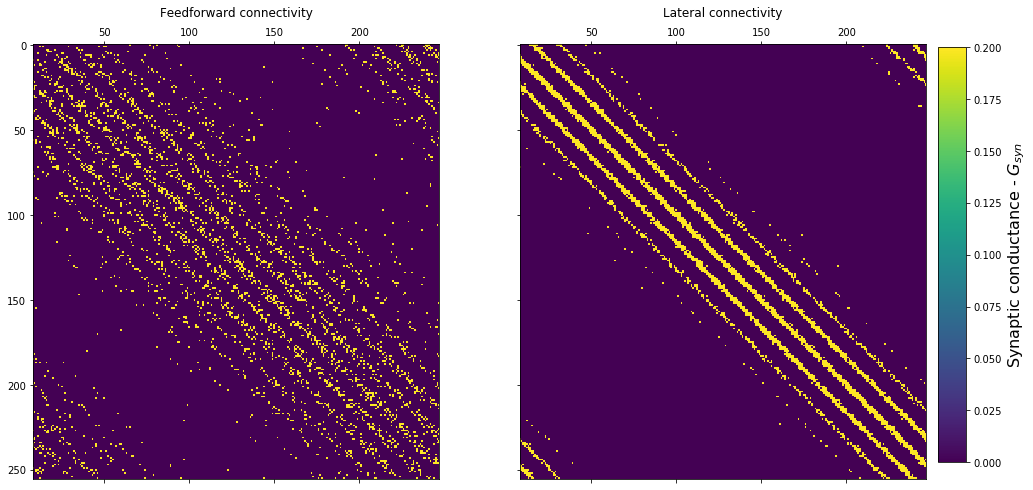

In [492]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)

ff_conn_ax = ax1.matshow(np.nan_to_num(np.nan_to_num(pre_weights[-1].reshape(256,256))), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(np.nan_to_num(np.nan_to_num(post_weights[-1].reshape(256,256))), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [433]:
diff_lat = post_weights[-1].reshape(256,256) - init_lat_connections.reshape(256, 256)

In [441]:
for pos in np.argwhere(np.isnan(diff_lat)):
    if np.isnan(post_weights[-1].reshape(256,256)[pos])[0]:
        print pos

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

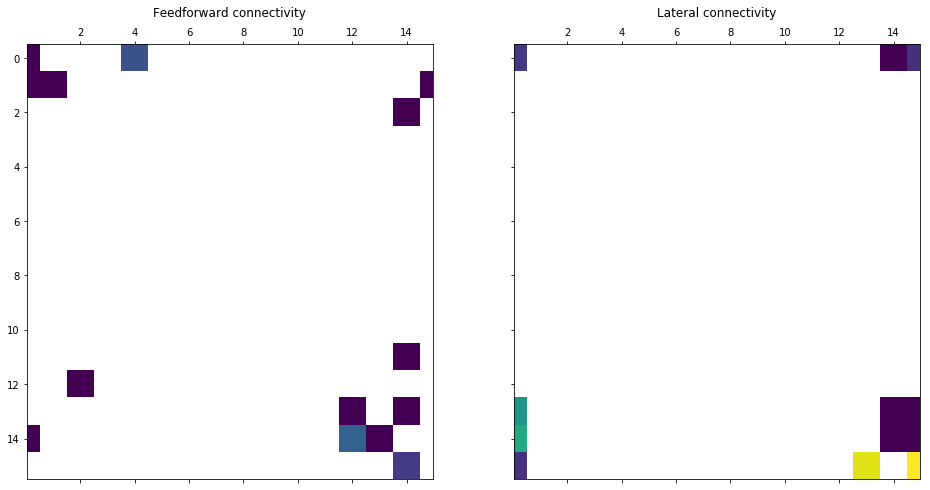

In [436]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(pre_weights[-1].reshape(256,256)[255, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(post_weights[-1].reshape(256,256)[255, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

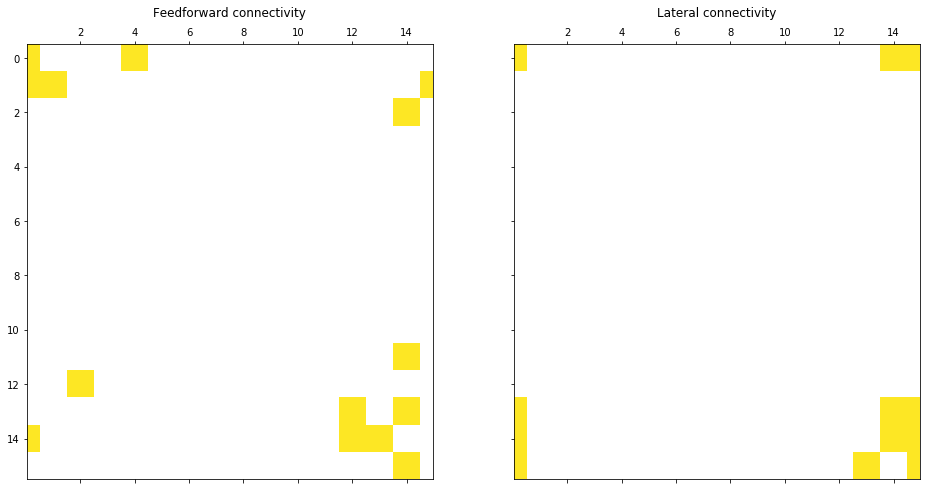

In [437]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(init_ff_connections[255, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(init_lat_connections[255, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

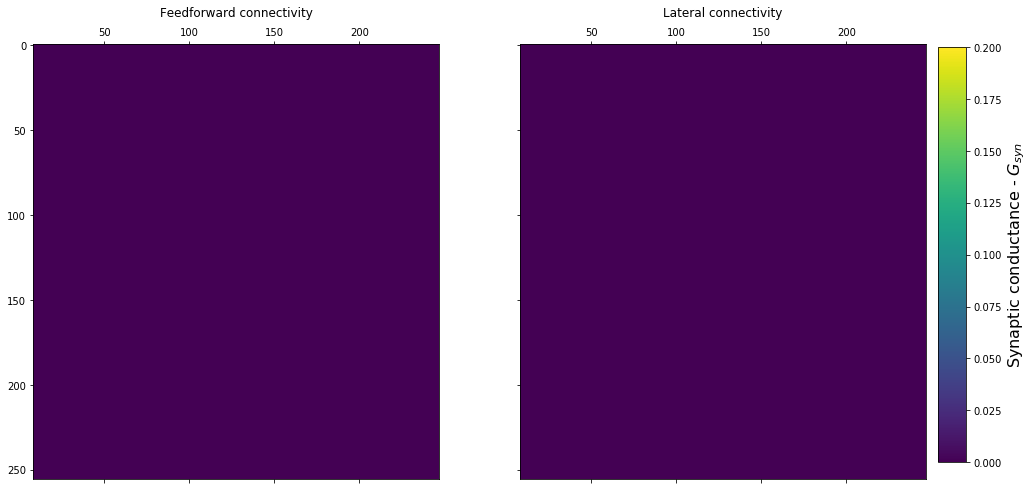

In [510]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(np.nan_to_num(init_ff_connections) - np.nan_to_num(pre_weights[-1].reshape(256,256)), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(np.nan_to_num(init_lat_connections) - np.nan_to_num(post_weights[-1].reshape(256,256)), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)